# Homework Exercise 1
## Kelly Betting


a) Write a simulation program of a single run. A run is the evolution of the capital.
The inputs are θ (deposit fraction), V0 (initial capital), p (winning probability), f
(return multiplier when winning), and M (length of the run). The output is the
end capital VM

In [1]:
# loading libraries
import numpy as np
import numpy.random as rnd
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def kellyBetting(theta, V0, p, f, M):
    VK = [] 
    VK.append(V0)
    
    for i in range(1,M+1):
        rv = rnd.binomial(size=1, n=1, p=p)[0]
        xk = theta*VK[i-1]
        VK.append(rv*(VK[i-1]+(f-1)*xk)+(1-rv)*(VK[i-1]-xk))
    return VK[-1]

def growth_factor(VK, V0,M):
    #logarithmic growth factor
    return 1/M*np.log(VK/V0)

def main():
    theta = 0.2
    V0 = 1000
    # probability 
    p = 0.36
    # deposit is mulitplied by 
    f = 3
    # moments of opportunity to extract a certain amount
    M = 4
    VE = kellyBetting(theta, V0, p, f, M)
    L = growth_factor(VE,V0, M)
    print("")
    print("Inital Capital", V0)
    print("End Capital", VE)
    print("Growth Factor", L)
    
# results of a single run
main()


Inital Capital 1000
End Capital 716.8
Growth Factor -0.08323960433035409


b)  Choose some values for the parameters V0, p, f, M such that pf > 1, and M ≥ 24
(interpretation: the opportunity moments are once per month; the plan is for at
least two years). Choose a deposit fraction θ. Estimate J(θ) = E[L(θ)] by running
sufficiently many sample paths. Give standard error and 95% confidence interval.
Check normality of the estimator by repeating R times (R sufficiently large) for
getting R observations of the estimator, and then (i) plot the histogram of these
data (should be Gaussian), (ii) compute the descriptive statistics of the data (mean,
variance, skewness, kurtosis), and (iii) run a normality test


estimate:  -0.023323407302068163
se : 0.001496024816020291
95%  ci: -0.026255615941467934 -0.02039119866266839

statistics
DescribeResult(nobs=1000, minmax=(11.610523571578899, 89838.1051912432), mean=1441.5069604553519, variance=16866770.895362433, skewness=13.017039111663466, kurtosis=240.0676256361564)

Jarque-Bera test for normality
test statistics 2429593.254480002
p-value 0.0


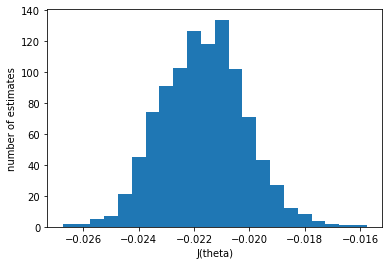

In [4]:
def main2():
    V0 = 1000
    # deposit is mulitplied by 
    f = 3
    # moments of opportunity to extract a certain amount
    M = 30
    # number of simulations
    s = 1000
    y = np.zeros(s)
    g = np.zeros(s)
    theta = 0.20
    p = 0.36
    for i in range(0,s):
        y[i]=kellyBetting(theta, V0, p, f, M)
        g[i] = growth_factor(y[i], V0, M)
    est = np.mean(g)
    s2 = np.var(g,ddof=1)
    se = np.sqrt(s2/i)
    
    # check for normality of estimators
    R = 1000
    est1 = np.zeros(R)
    for j in range(R):
        log_growths = []
        for i in range(s):
            VE = kellyBetting(theta, V0, p, f, M)
            log_growths.append(growth_factor(VE, V0, M))
        est1[j] = sum(log_growths) / len(log_growths)
   
    # histogram
    plt.hist(est1, bins=np.arange(min(est1), max(est1) + 0.0005, 0.0005))
    plt.xlabel("J(theta)")
    plt.ylabel("number of estimates")
    # describtive statistics
    print("")
    print("estimate: ", est)
    print("se :", se)
    print("95%  ci:", est-1.96*se, est+1.96*se)
    print("")
    print("statistics")
    print(sts.describe(y))
    print("")
    
    
    # normality test
    jb, pv = sts.jarque_bera(y)
    print("Jarque-Bera test for normality")
    print("test statistics", jb)
    print("p-value", pv)
    
    
        
main2()

c) Plot the graph of (the estimate of) J(θ) for 0 ≤ θ < θ0, where θ0 < 1 is such that
you see clearly a maximum of J(θ) (for instance, p = 0.36, f = 3, M = 60 then
θ0 = 0.1 is fine). Use common random numbers.

Text(0, 0.5, 'J(theta)')

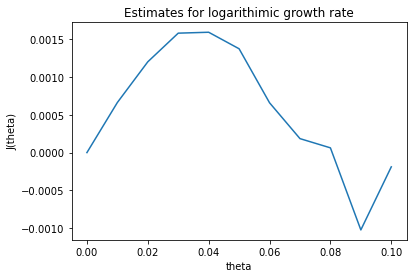

In [5]:
rng = rnd.default_rng()
#  s number of simulations
s = 1000
p = 0.36
f = 3
M = 60
V0 = 1000
theta0 = 0.1
thetas = np.arange(0,0.11,0.01)

estimate_theta = []
for t in thetas:
    log_growths=[]
    for i in range(s):
        VE = kellyBetting(t, V0, p, f, M)
        log_growths.append(growth_factor(VE, V0, M))
    estimate_theta.append(sum(log_growths) / len(log_growths))

plt.plot(thetas, estimate_theta)
plt.title("Estimates for logarithimic growth rate")
plt.xlabel("theta")
plt.ylabel("J(theta)")

In [29]:
df = pd.DataFrame(thetas)
df1 = pd.DataFrame(estimate_theta)
# examine maximum
df = pd.concat([df,df1],axis=1)
df


,0,0
0,0.00,0.000000
1,0.01,0.000706
2,0.02,0.001291
3,0.03,0.001459
4,0.04,0.001588
5,0.05,0.001362
6,0.06,0.001420
7,0.07,0.000430
8,0.08,0.000206
9,0.09,-0.000397


d) Repeat (c), concerning maximizing the expected end capital E[VM(θ)] as function
of θ.

Text(0, 0.5, 'End capital')

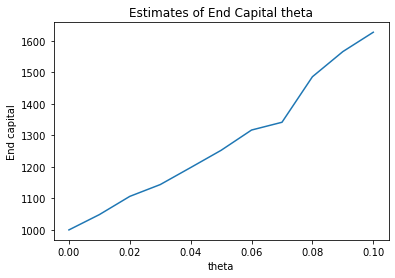

In [7]:
estimate_theta_capital = []
for t in thetas:
    final_capital =[]
    for i in range(s):
        final_capital.append(kellyBetting(t, V0, p, f, M))
    estimate_theta_capital.append(sum(final_capital) / len(final_capital))

plt.plot(thetas, estimate_theta_capital)
plt.title("Estimates of End Capital theta")
plt.xlabel("theta")
plt.ylabel("End capital")

e) From the graphs of E[L(θ)] (in (c)) and E[VM(θ)] (in (d)) (as functions of θ) you
extract approximately the optimizing fractions θ
∗
(for the logarithmic growth), and
θ
∗∗ (for the end capital). Now run for these two fractions again sufficiently many
sample paths and construct the histograms of the end capitals. These reflect the
distributions of VM(θ
∗
) and VM(θ
∗∗), respectively. Also, compute (estimate) the
variances of VM(θ
∗
) and VM(θ
∗∗). The variances reflect the risk of the investment
plan

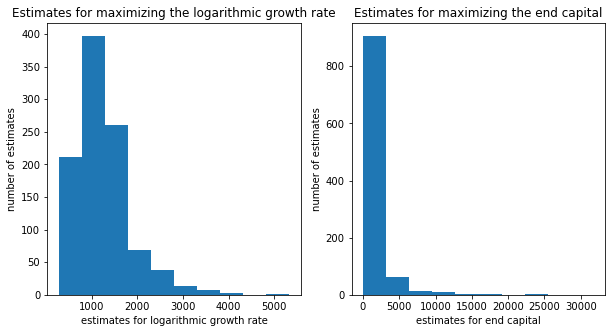

Variance for maximizing logarithmic growth rate 
 343404.6394570824
Variance for maximizing the end capital 
 5567076.35674315


In [9]:
# theta for max growth rate in c
theta_growth = 0.04
# theta for max captial in d
theta_capital = 0.1

end_capital_growth = []
end_capital_capital = []
for i in range(s):
    VE_capital = kellyBetting(theta_growth, V0, p, f, M)
    VE_growth = kellyBetting(theta_capital, V0, p, f, M)
    end_capital_growth.append(VE_capital)
    end_capital_capital.append(VE_growth)

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(end_capital_growth)
ax1.set_ylabel("number of estimates")
ax1.set_title('Estimates for maximizing the logarithmic growth rate')
ax1.set_xlabel("estimates for logarithmic growth rate")
ax2.hist(end_capital_capital)
ax2.set_title('Estimates for maximizing the end capital')
ax2.set_ylabel("number of estimates")
ax2.set_xlabel("estimates for end capital")
plt.show()

print("Variance for maximizing logarithmic growth rate \n", np.var(end_capital_growth))
print("Variance for maximizing the end capital \n", np.var(end_capital_capital))

(f). Discuss your observations from the results in (e).

The variance for maximizing the end capital is much larger (larger risk) than maximizing the growth rate. Additionally, the distribution for maximizing the end capital has a much higher peek and is less smoothly distributed compared to the distribution for maximizing the logarithmic growth rate. 
